# Support Vector Machine

In [6]:
# import all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [7]:
# Load the Training and Testing Data
x_train = pd.read_pickle('data/x_train_res.pkl')
y_train = pd.read_pickle('data/y_train_res.pkl')

x_test = pd.read_pickle('data/x_test.pkl')
y_test = pd.read_pickle('data/y_test.pkl')

## Implementing Basic Support Vector Machine

In [8]:
# model
svm = SVC()

# fit the model
svm.fit(x_train, y_train)

# prediction
predictions = svm.predict(x_test)

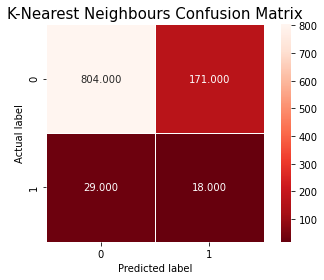

In [9]:
cm = confusion_matrix(y_test, predictions)
plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Support Vector Machine Confusion Matrix', size = 15);
plt.show()

In [10]:
# Take F1 macro score as performance metric
f1_macro_average = f1_score(y_test, predictions, average='macro')

print(f'F1 score --> {round(f1_macro_average*100, 2)}%')

F1 score --> 52.1%


## Hyperparameter Tuning for Better Results

We will tune for:
- Regularization parameter (C)
- Kernel coefficient (gamma)

In [21]:
# Create a list of Regularization parameter values
C = [0.1, 1, 10, 100]
# create a list of gamma values
# gamma = [0.0001, 0.001, 0.01, 0.1, 1, 10]

#Convert to dictionary
hyperparameters = dict(C=C)

print(hyperparameters)

{'C': [0.1, 1, 10, 100]}


In [22]:
# Implement GridSearch to check and get the best hyperparameters

# estimator = ML model to be tested
# param_grid = dictionary of hyperparameters to be tested
# scoring = the scoring metric, for this imbalanced classification task, i chose f1 macro
# n_jobs = number of cores to be used in parallel, -1 means use all
# cv = number of cross validation set elements
# verbose = setting it to 2 will print updates to the terminal

best_model = GridSearchCV(estimator=SVC(),
                         param_grid=hyperparameters, 
                         scoring = 'f1_macro',
                         n_jobs=-1,
                         cv=10,
                         verbose=2)

# Fit the model
best_model = best_model.fit(x_train,y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [23]:
C = best_model.best_estimator_.get_params()['C']
gamma = best_model.best_estimator_.get_params()['gamma']

print(f'Best C: {C}')
print(f'Best gamma: {gamma}')

Best C: 100
Best gamma: scale


In [24]:
# model
svm = SVC(C=C)

# fit the model
svm.fit(x_train, y_train)

# prediction
predictions = svm.predict(x_test)

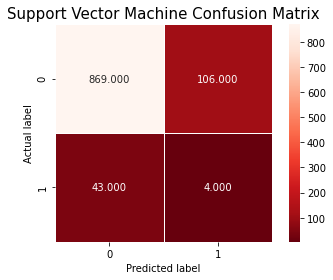

In [25]:
cm = confusion_matrix(y_test, predictions)
plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Support Vector Machine Confusion Matrix', size = 15);
plt.show()

In [26]:
# Take F1 macro score as performance metric
f1_macro_average = f1_score(y_test, predictions, average='macro')

print(f'F1 score --> {round(f1_macro_average*100, 2)}%')

F1 score --> 48.6%
[CV] END .................................C=0.1, gamma=0.001; total time=   7.5s
[CV] END ..................................C=0.1, gamma=0.01; total time=   4.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   3.5s
[CV] END .....................................C=0.1, gamma=1; total time=   5.2s
[CV] END ..................................C=1, gamma=0.0001; total time=   5.6s
[CV] END ....................................C=1, gamma=0.01; total time=   3.4s
[CV] END .....................................C=1, gamma=0.1; total time=   2.5s
[CV] END ......................................C=1, gamma=10; total time=   7.8s
[CV] END ..................................C=10, gamma=0.001; total time=   3.2s
[CV] END ...................................C=10, gamma=0.01; total time=   2.9s
[CV] END ......................................C=10, gamma=1; total time=   3.4s
[CV] END ................................C=100, gamma=0.0001; total time=   3.4s
[CV] END 

[CV] END ................................C=0.1, gamma=0.0001; total time=   8.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   4.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   3.9s
[CV] END ....................................C=0.1, gamma=10; total time=   6.3s
[CV] END ..................................C=1, gamma=0.0001; total time=   5.7s
[CV] END ....................................C=1, gamma=0.01; total time=   3.2s
[CV] END ......................................C=1, gamma=10; total time=   7.5s
[CV] END .................................C=10, gamma=0.0001; total time=   3.7s
[CV] END ...................................C=10, gamma=0.01; total time=   2.8s
[CV] END ......................................C=10, gamma=1; total time=   3.4s
[CV] END ................................C=100, gamma=0.0001; total time=   3.4s
[CV] END ................................C=100, gamma=0.0001; total time=   3.4s
[CV] END ...................

[CV] END ................................C=0.1, gamma=0.0001; total time=   8.4s
[CV] END ..................................C=0.1, gamma=0.01; total time=   4.6s
[CV] END .....................................C=0.1, gamma=1; total time=   5.3s
[CV] END ....................................C=0.1, gamma=10; total time=   6.1s
[CV] END ...................................C=1, gamma=0.001; total time=   4.6s
[CV] END .....................................C=1, gamma=0.1; total time=   2.5s
[CV] END .......................................C=1, gamma=1; total time=   4.1s
[CV] END ......................................C=1, gamma=10; total time=   7.1s
[CV] END ...................................C=10, gamma=0.01; total time=   2.8s
[CV] END ....................................C=10, gamma=0.1; total time=   1.8s
[CV] END .....................................C=10, gamma=10; total time=   6.9s
[CV] END .................................C=100, gamma=0.001; total time=   3.4s
[CV] END ...................